# Exercise 0 - uppvärmning med riket
a) Börja med att läsa in filen riket2023_åk9_np.xlsx och sheets för de olika ämnena. Ändra kolumnnamnen på
respektive dataframe så du får något liknande som nedan.

In [2]:
import pandas as pd

df_riket = pd.read_excel(
    "../Laboration2/Data/riket2023_åk9_np.xlsx", sheet_name=None, skiprows=8
)
sheets = ["Engelska", "Matematik", "Svenska", "Svenska som andraspråk"]

# Function to rename column names
def rename_columns(df):
    df.columns = [
        "Plats",
        "Huvudman",
        "Totalt (A-F)",
        "Flickor (A-F)",
        "Pojkar (A-F)",
        "Totalt (A-E)",
        "Flickor (A-E)",
        "Pojkar (A-E)",
        "Totalt (poäng)",
        "Flickor (poäng)",
        "Pojkar (poäng)",
    ][: len(df.columns)]
    return df

# If sheet_name is in sheets column name is changed on each sheet and DataFrame
for sheet_name, df in df_riket.items():
    if sheet_name in sheets:
        df_riket[sheet_name] = rename_columns(df)

b) Ta reda på antalet som fått F i matematik totalt, pojkar respektive flickor.

In [3]:
def calculate_f_grade(df, total_column, girls_column, boys_column):
    # Extract percentage of girls with grades A-E
    girls_percentage = float(str(df.iloc[0][girls_column]).replace(",", "."))
    # Extract total number of girls with grades A-F
    total_girls_a_f = int(df.iloc[0][girls_column.replace("(A-E)", "(A-F)")])
    # Calculate number of girls with grade F
    girls_f = int((100 - girls_percentage) / 100 * total_girls_a_f)

    total_percentage = float(str(df.iloc[0][total_column]).replace(",", "."))
    total_students_a_f = int(df.iloc[0][total_column.replace("(A-E)", "(A-F)")])
    total_f = int((100 - total_percentage) / 100 * total_students_a_f)

    boys_percentage = float(str(df.iloc[0][boys_column]).replace(",", "."))
    total_boys_a_f = int(df.iloc[0][boys_column.replace("(A-E)", "(A-F)")])
    boys_f = int((100 - boys_percentage) / 100 * total_boys_a_f)
    return girls_f, total_f, boys_f

# Access the "Matematik" DataFrame
df_math = df_riket["Matematik"]

# Calculate the number of total, boys, and girls students who received an F in mathematics
total_f, boys_f, girls_f = calculate_f_grade(df_math, "Totalt (A-E)", "Pojkar (A-E)", "Flickor (A-E)")

print("Total number of students who received an F in mathematics:", total_f)
print("Number of boys who received an F in mathematics:", boys_f)
print("Number of girls who received an F in mathematics:", girls_f)

Total number of students who received an F in mathematics: 5797
Number of boys who received an F in mathematics: 11637
Number of girls who received an F in mathematics: 5824


c) Rita ett stapeldiagram på totala poängen för de olika ämnena.

- Jag hade problem när jag skulle plotta denna graf pågrund av Rapportbeskrivning och def. Jag fick lägga in en if-sats som kontrollerar att subject inte är Rapportbeskrivning och def och en except med ValueError och KeyError. Detta gör att Rapportbeskrivning och def inte ingår i listan av ämnen som används för att skapa grafen.

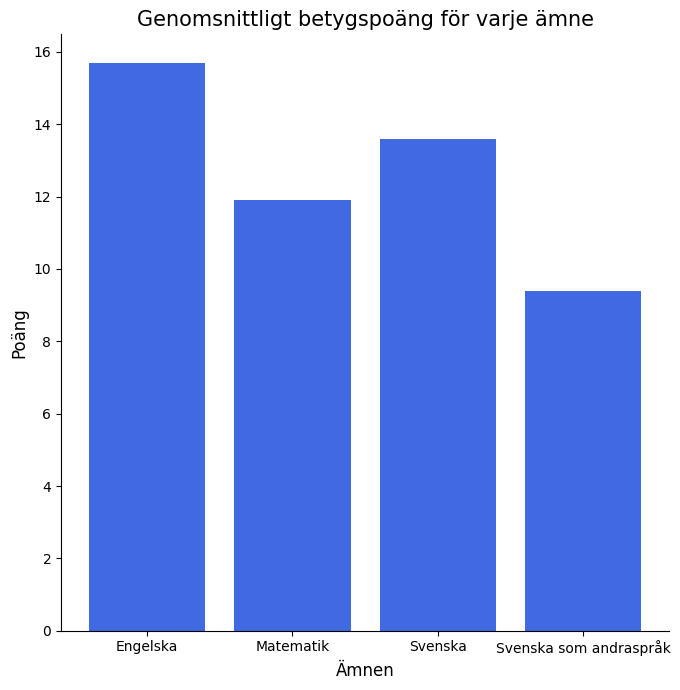

In [4]:
import matplotlib.pyplot as plt

def plot_total_points(df_dict):
    subjects = list(df_dict.keys())
    total_points = []

    for subject in subjects:
        # Ignore the last sheet "Rapportbeskrivning och def"
        if subject != "Rapportbeskrivning och def.":
            try:
                # Extract total point from DataFrame for specific subject
                total_point = float(df_dict[subject].loc[0]["Totalt (poäng)"])
                total_points.append(total_point)
            except (ValueError, KeyError):
                # If column doesn't exist or the value can't convert to float. Set value to 0.
                total_points.append(0)  

    plt.figure(figsize=(7, 7))
    # Ignore last sheet
    plt.bar(subjects[:-1], total_points, color="royalblue")  
    plt.title("Genomsnittligt betygspoäng för varje ämne", fontsize=15)
    plt.xlabel("Ämnen", fontsize=12)
    plt.ylabel("Poäng", fontsize=12)
    plt.gca().spines[["top", "right"]].set_visible(False)
    plt.xticks(rotation=0)
    plt.tight_layout(rect=[0, 0, 1, 1])
    plt.show()

plot_total_points(df_riket)

d) Rita fyra olika stapeldiagram i subplots på totala poängen för de olika ämnena för de olika huvudmännen.
- Svårigheterna med denna uppgift var att ta bort x-axel-tickmarkeringar och etiketter från sista subplotten och för Svenska som andraspråk. Jag tycker överlag att det är svårare att jobba med matplotlib och grafer än plotly. Det också krånligt att få till mellanrum mellan subplotten.

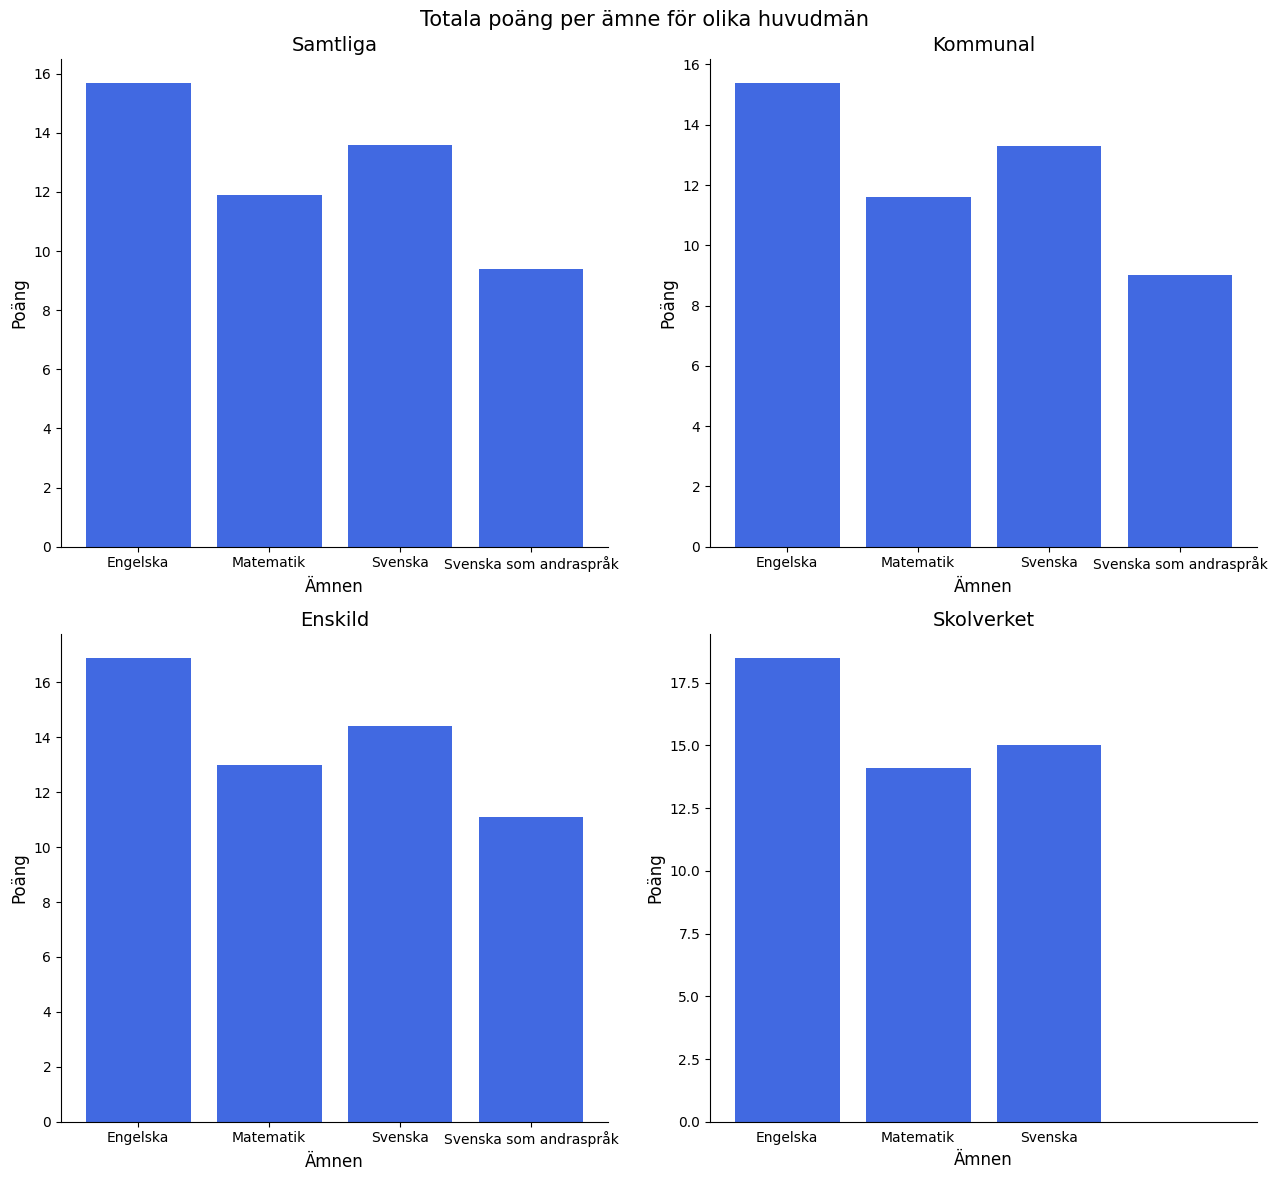

In [66]:
import matplotlib.pyplot as plt

def plot_subplots(df_dict):
    subjects = list(df_dict.keys())
    principals = df_dict[subjects[0]]["Huvudman"].unique()
    
    fig, ax = plt.subplots(2, 2, figsize=(13, 12))
    fig.suptitle("Totala poäng per ämne för olika huvudmän", fontsize=15)
    
    for i, h in enumerate(principals):
        total_points = []
        for subject in subjects:
            if subject != "Rapportbeskrivning och def.":
                try:
                    df_huvudman = df_dict[subject][df_dict[subject]["Huvudman"] == h]
                    total_point = float(df_huvudman.iloc[0]["Totalt (poäng)"])
                    total_points.append(total_point)
                except (ValueError, KeyError, IndexError):
                    total_points.append(0)
        
        row = i // 2
        col = i % 2
        
        ax[row, col].bar(subjects[:-1], total_points, color="royalblue")
        ax[row, col].set_title(f'{h}', fontsize=14)
        ax[row, col].set_ylabel("Poäng", fontsize=12)
        ax[row, col].set_xlabel("Ämnen", fontsize=12)
        ax[row, col].tick_params(axis="x", rotation=0)
        ax[row, col].spines[["top", "right"]].set_visible(False)
        
        # Kontrollera om den aktuella plotten är den sista och om ämnet är "Svenska som andraspråk"
        if i == len(principals) - 1 and "Svenska som andraspråk" in subjects:
            ax[row, col].tick_params(axis="x", which="both", bottom=False)
            for label in ax[row, col].get_xticklabels():
                if label.get_text() not in ["Engelska", "Matematik", "Svenska"]:
                    label.set_visible(False)

    plt.tight_layout(rect=[0, 0, 1, 1])
    plt.show()

plot_subplots(df_riket)

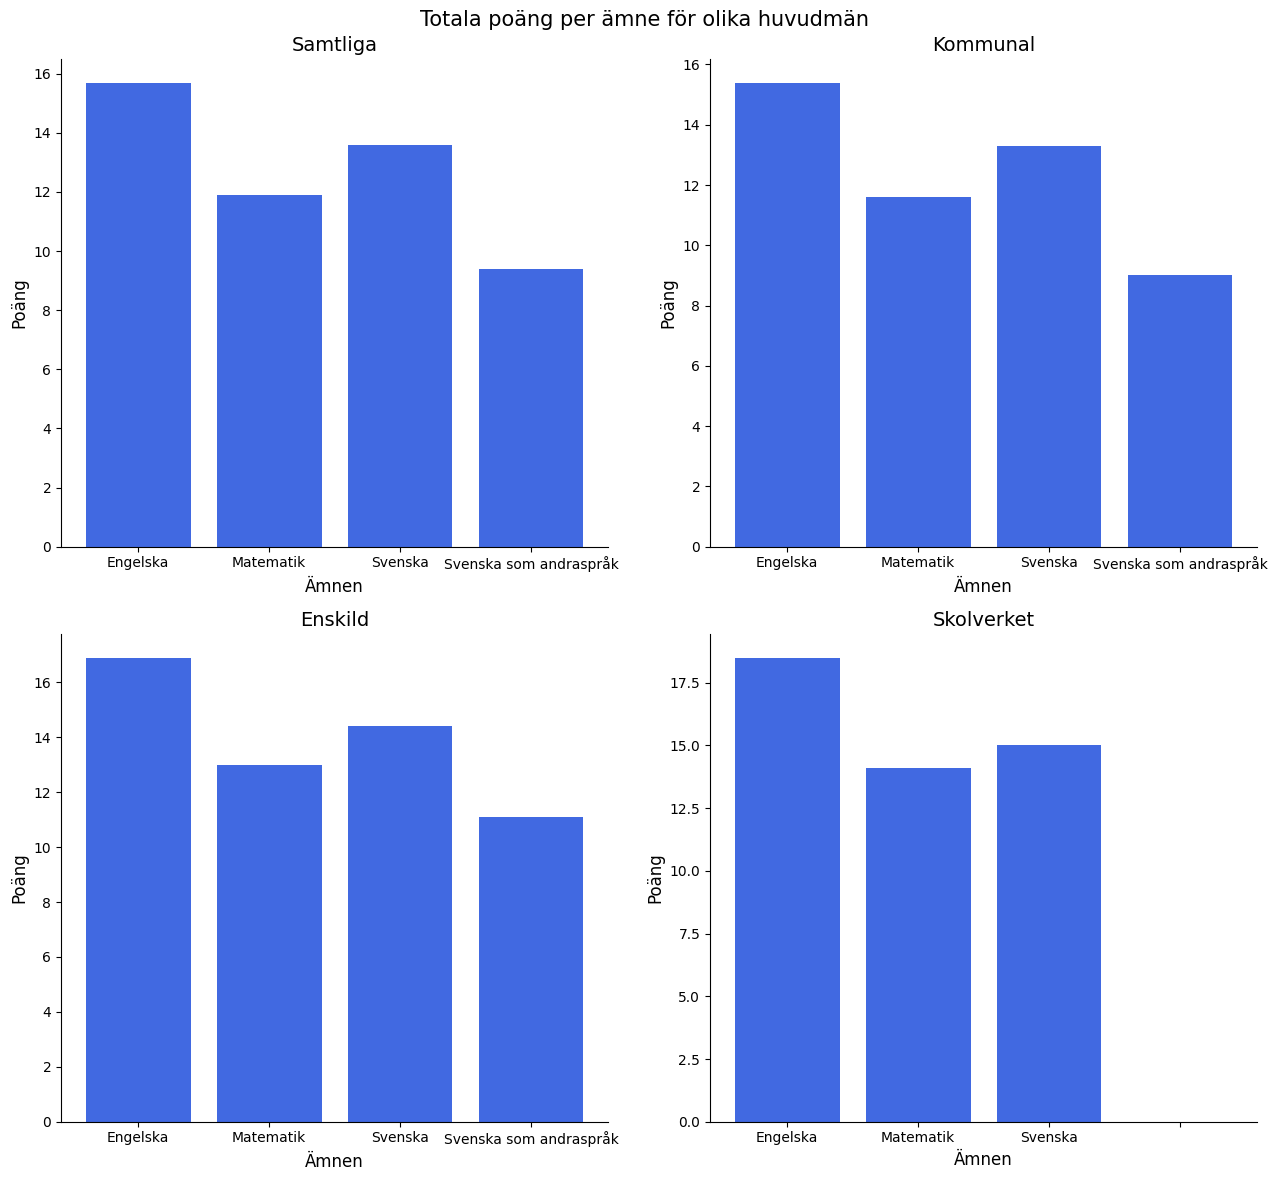

In [64]:
import matplotlib.pyplot as plt

def plot_subplots(df_dict):
    subjects = list(df_dict.keys())
    principals = df_dict[subjects[0]]["Huvudman"].unique()
    
    fig, ax = plt.subplots(2, 2, figsize=(13, 12))
    fig.suptitle("Totala poäng per ämne för olika huvudmän", fontsize=15)
    
    for i, h in enumerate(principals):
        total_points = []
        for subject in subjects:
            if subject != "Rapportbeskrivning och def.":
                try:
                    df_huvudman = df_dict[subject][df_dict[subject]["Huvudman"] == h]
                    total_point = float(df_huvudman.iloc[0]["Totalt (poäng)"])
                    total_points.append(total_point)
                except (ValueError, KeyError, IndexError):
                    total_points.append(0)
        
        row = i // 2
        col = i % 2
        
        ax[row, col].bar(subjects[:-1], total_points, color="royalblue")
        ax[row, col].set_title(f'{h}', fontsize=14)
        ax[row, col].set_ylabel("Poäng", fontsize=12)
        ax[row, col].set_xlabel("Ämnen", fontsize=12)
        ax[row, col].tick_params(axis="x", rotation=0)
        ax[row, col].spines[["top", "right"]].set_visible(False)
        
        # Kontrollera om den aktuella plotten är den sista
        if i == len(principals) - 1:
            ax[row, col].tick_params(axis="x", which="both", bottom=True)
            for label in ax[row, col].get_xticklabels():
                if "Svenska som andraspråk" in label.get_text():
                    label.set_visible(False)

        if i == len(principals) - 1 and "Svenska som andraspråk" in subjects:
            ax[row, col].tick_params(axis="x", which="both", bottom=False)
            for label in ax[row, col].get_xticklabels():
                if label.get_text() not in ["Engelska", "Matematik", "Svenska"]:
                    label.set_visible(False)

    plt.tight_layout(rect=[0, 0, 1, 1])
    plt.show()

plot_subplots(df_riket)

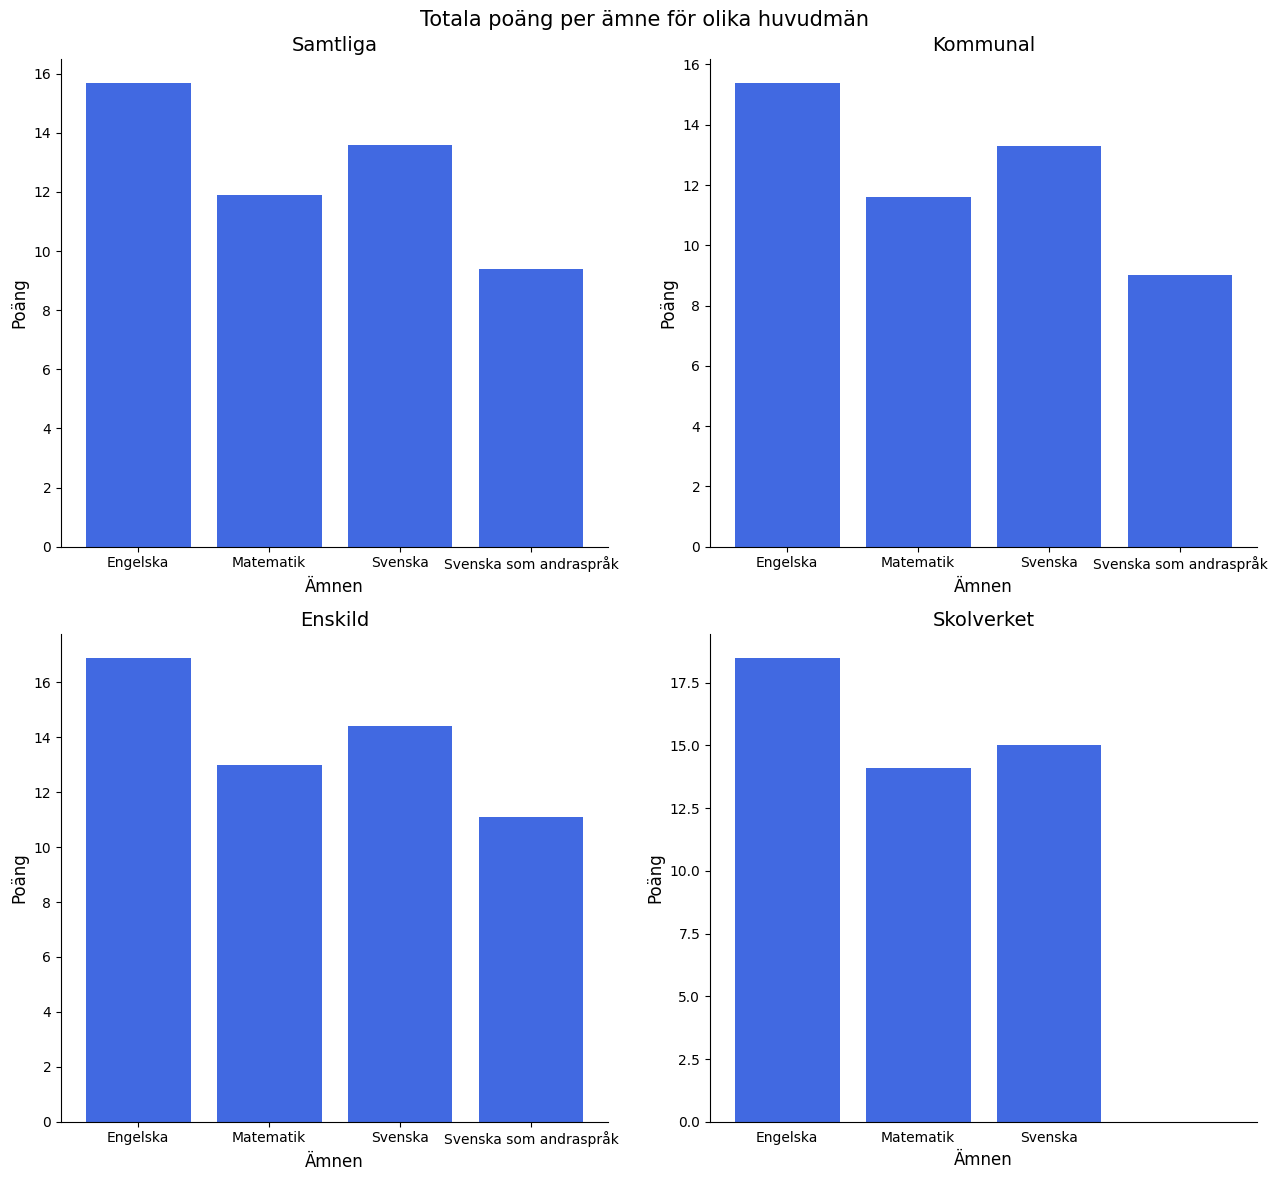

In [68]:
import matplotlib.pyplot as plt

def plot_subplots(df_dict):
    subjects = list(df_dict.keys())
    principals = df_dict[subjects[0]]["Huvudman"].unique()
    
    fig, ax = plt.subplots(2, 2, figsize=(13, 12))
    fig.suptitle("Totala poäng per ämne för olika huvudmän", fontsize=15)
    
    for i, h in enumerate(principals):
        total_points = []
        for subject in subjects:
            if subject != "Rapportbeskrivning och def.":
                try:
                    df_huvudman = df_dict[subject][df_dict[subject]["Huvudman"] == h]
                    total_point = float(df_huvudman.iloc[0]["Totalt (poäng)"])
                    total_points.append(total_point)
                except (ValueError, KeyError, IndexError):
                    total_points.append(0)
        
        row = i // 2
        col = i % 2
        
        ax[row, col].bar(subjects[:-1], total_points, color="royalblue")
        ax[row, col].set_title(f'{h}', fontsize=14)
        ax[row, col].set_ylabel("Poäng", fontsize=12)
        ax[row, col].set_xlabel("Ämnen", fontsize=12)
        ax[row, col].tick_params(axis="x", rotation=0)
        ax[row, col].spines[["top", "right"]].set_visible(False)
        
        # Kontrollera om den aktuella plotten är den sista och om ämnet är "Svenska som andraspråk"
        if i == len(principals) - 1 and "Svenska som andraspråk" in subjects:
            for label in ax[row, col].get_xticklabels():
                if label.get_text() not in ["Engelska", "Matematik", "Svenska"]:
                    label.set_visible(False)
            ax[row, col].tick_params(axis="x", which="both", bottom=False)

    plt.tight_layout(rect=[0, 0, 1, 1])
    plt.show()

plot_subplots(df_riket)

# Uppgift 1 - uppvärmning betyg och prov
a) Rita ett linjediagram för andel elever som saknar godkänt betyg i ett eller fler ämnen för läsår 18-23. Ta med totalt,
flickor och pojkar i samma graf.

In [6]:
import plotly.express as px
import pandas as pd

sheet = "Tabell 1B"
df_grades = pd.read_excel("../Laboration2/Data/betyg_o_prov_riksnivå.xlsx", sheet_name=sheet, skiprows=7)

# Rename column names
rename_column = [
    "Läsår/Huvudman/Bakgrund",
    "Totalt (16 ämnen)",
    "Flickor (16 ämnen)",
    "Pojkar (16 ämnen)",
    "Totalt (17 ämnen)",
    "Flickor (17 ämnen)",
    "Pojkar (17 ämnen)",
    "Totalt (saknar godkänt)",
    "Flickor (saknar godkänt)",
    "Pojkar (saknar godkänt)"
]

df_grades.columns = rename_column

In [55]:
fig = px.line(
    # Include only the first five rows
    df_grades.head(5),
    x="Läsår/Huvudman/Bakgrund",
    y=[
        "Totalt (saknar godkänt)",
        "Flickor (saknar godkänt)",
        "Pojkar (saknar godkänt)"
    ],
    labels={"value": "Andel (%)", "variable": "Kategori"},
    title="Andel elever som saknar godkänt betyg per läsår",
    markers=True,
    color_discrete_sequence=["royalblue", "orange", "red"]
)

fig.update_layout(
    title={
        "text": "Andel elever som saknar godkänt betyg per läsår",
        "x": 0.4,  # Center title along x-axis
        "xanchor": "center",  # Center title horizontally
        "font": {"size": 17}
    },
    xaxis_title={
        "text": "Läsår",
        "font": {"size": 16}
    },
    yaxis_title={
        "text": "Andel (%)",
        "font": {"size": 16}
    },
    xaxis=dict(tickmode="linear"),
    legend_title = "Elever"
)
fig.show()

b) Rita ett linjediagram för meritvärde för 16 ämnen för totalt, flickor och pojkar för läsår 18-23

In [39]:
fig = px.line(
    df_grades.head(5),
    x="Läsår/Huvudman/Bakgrund",
    y=[
        "Totalt (16 ämnen)",
        "Flickor (16 ämnen)",
        "Pojkar (16 ämnen)"
    ],
    labels={"value": "Genomsnittligt meritvärde beräknat på 16 ämnen", "variable": "Kategori"},
    title="Genomsnittligt meritvärde beräknat på 16 ämnen",
    markers=True,
    color_discrete_sequence=["royalblue", "orange", "red"]
)
fig.update_layout(
    xaxis_title="Läsår", yaxis_title="Meritvärde", xaxis=dict(tickmode="linear")
)
fig.show()

 c) Undersök nu andra variabler, och hur de påverkar meritvärde och andel med minst ett saknat betyg. Data finns för
läsår 22/23. Exempel kan man undersöka föräldrarnas utbildningsbakgrund. Rita lämpliga grafer.
- Reflektion

In [131]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import pandas as pd

def filter_data(df, education_levels, value_column):
    """Filter data based on education level and value column."""
    return df[df["Läsår/Huvudman/Bakgrund"].isin(education_levels)][
        ["Läsår/Huvudman/Bakgrund", value_column]
    ]

def create_bar_chart(df, category_column, value_column, name):
    """Create a bar chart trace for the given dataframe."""
    return go.Bar(x=df[category_column].str.replace(' ', '<br>'), y=df[value_column], name=name)


# Ange vilka utbildningsnivåer som ska inkluderas i plotten
education_levels = [
    "Förgymnasial utbildning",
    "Gymnasial utbildning",
    "Eftergymnasial utbildning",
]

# Skapa subplotter med två kolumner
fig = make_subplots(
    rows=1,
    cols=2,
    subplot_titles=(
        "Genomsnittligt meritvärde",
        "Andel som saknar godkänt",
    ),
)

# Add subplot for average merit rating for girls
df_avg_grades = filter_data(df_grades, education_levels, "Flickor (16 ämnen)")
avg_grades_chart = create_bar_chart(
    df_avg_grades, "Läsår/Huvudman/Bakgrund", "Flickor (16 ämnen)", name="Flickor (16 ämnen)"
)
fig.add_trace(avg_grades_chart, row=1, col=1)

# Add subplot percentage for girls who lacks grad Lägg till subplot för andel flickor som saknar godkänt
df_lacking_grades = filter_data(df_grades, education_levels, "Flickor (saknar godkänt)")
lacking_grades_chart = create_bar_chart(
    df_lacking_grades, "Läsår/Huvudman/Bakgrund", "Flickor (saknar godkänt)", name="Flickor (saknar godkänt)"
)
fig.add_trace(lacking_grades_chart, row=1, col=2)

# Update x-axis and y-axis titles for the first and second subplot
fig.update_xaxes(title_text="Utbildningsnivå", showline=True, linecolor='black', tickangle=0, row=1, col=1)  # First subplot
fig.update_yaxes(title_text="Meritvärde", showline=True, linecolor='black', row=1, col=1)
fig.update_xaxes(title_text="Utbildningsnivå", showline=True, linecolor='black', tickangle=0, row=1, col=2)  # Second subplot
fig.update_yaxes(title_text="Andel (%)", showline=True, linecolor='black', row=1, col=2)

fig.update_layout(
    title_text="Jämförelse mellan skolresultat baserat på föräldrarnas utbildningsnivå", height=600, width=1000,
    plot_bgcolor="white",  # Makes plot background white
    paper_bgcolor="white" # Makes paper background white
)

fig.show()

# Uppgift 2 - KPIer & EDA

Definiera 3-6 KPIer utöver de som använts i ovanstående uppgifter och gör explorativ dataanalys på en eller flera
dataset som ni får söka själva. Ni får inte ta dataseten som ni redan jobbat med i uppgift 0 och 1. Excel och eller csv-filer
kan ni hitta i skolverkets statistik
Se till att dokumentera vad du undersöker med markdown kombinerad med kod i Jupyter notebook eller om du
använder Pythonskript, skriv en markdown vid sidan om. Dokumentera också vad du kommer fram till och spara alla
visualiseringar.

# KPI

1. Något med personal. Hur utbildade?
- 
2. Kostnader per län. Vilka kostnader?
- 
3. Vad gör elever efter gymnasiet?
- 


- Jag valde att göra subplot med Plotly för att det såg visuellt bättre ut på tidigare uppgifter jämfört mer matplotlib. Vidareutveckling: göra mer visuell/analyserande = Linjediagram. Ett för praktiska och ett för teoretiska med 1, 3 och 5 år.

In [88]:
import pandas as pd

df_working = pd.read_excel("../Laboration2/Data/efter_gymnasieskolan_län.xlsx", sheet_name=None, skiprows=9)
sheets_education = ["Byggprogrammet", "Omvårdnadsprogrammet", "Fordonsprogrammet", "Naturvetenskapsprogrammet", "Samhällsvetenskapsprogrammet", "Teknikprogrammet"]

def rename_columns(df):
    df.columns = [
        "Län",
        "Länskod",
        "Typ av huvudman",
        "Antal ungdomar",
        "Etablerade 1 år",
        "Studerande 1 år",
        "Etablerade 3 år",
        "Studerande 3 år",
        "Etablerade 5 år",
        "Studerande 5 år"
    ]
    return df

for sheet_name, df in df_working.items():
    if sheet_name in sheets_education:
        df_working[sheet_name] = rename_columns(df)

In [106]:
from plotly.subplots import make_subplots
import plotly.graph_objs as go

# Function to filter data on right row and column
def filter_data(df):
    return df[(df["Län"] == "Stockholms län") & (df["Typ av huvudman"] == "Samtliga")]

# Function to get specific value on right column
def get_value(df):
    filtered_df = filter_data(df)
    if not filtered_df.empty:
        return filtered_df["Etablerade 3 år"].iloc[0]
    else:
        return None

# Create list with each program and equivalent data
theoretical_programs = ["Teknik", "Samhällsvetenskap", "Naturvetenskap"]
theoretical_data = [get_value(df_working["Teknikprogrammet"]), get_value(df_working["Samhällsvetenskapsprogrammet"]), get_value(df_working["Naturvetenskapsprogrammet"])]
practical_programs = ["Bygg", "Omvårdnad", "Fordon"]
practical_data = [get_value(df_working["Byggprogrammet"]), get_value(df_working["Omvårdnadsprogrammet"]), get_value(df_working["Fordonsprogrammet"])]

fig = make_subplots(rows=1, cols=2, subplot_titles=("Teoretiska program", "Praktiska program"))

# Add bars for each program
for subject, data in zip(theoretical_programs, theoretical_data):
    fig.add_trace(go.Bar(name=subject, x=[subject], y=[data]), row=1, col=1)
for subject, data in zip(practical_programs, practical_data):
    fig.add_trace(go.Bar(name=subject, x=[subject], y=[data]), row=1, col=2)

# Update x-axis and y-axis titles for the first and second subplot
fig.update_xaxes(title_text="Program", showline=True, linecolor='black', row=1, col=1)
fig.update_yaxes(title_text="Andel (%)", showline=True, linecolor='black', row=1, col=1)
fig.update_xaxes(title_text="Program", showline=True, linecolor='black', row=1, col=2)
fig.update_yaxes(title_text="Andel (%)", showline=True, linecolor='black', row=1, col=2)

fig.update_layout(
    title="Etablering på arbetsmarknaden 3 år efter examen",
    barmode="group",
    plot_bgcolor="white",  # Makes plot background white
    paper_bgcolor="white" # Makes paper background white
)

fig.show()